In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
M = 1000
N = 20
x = np.linspace(0, 1, N)
u = np.ones(N)
dt = 1.0 / M
dx = 1.0 / N
D = 1.0
alpha = D * dt / dx**2

In [20]:
g0 = 1.0
gN = 0.0
for itime in range(M):
    u_new = np.zeros(N)
    for i in range(1, N - 1):
        u_new[i] = u[i] + alpha * (u[i + 1] - 2 * u[i] + u[i - 1])
    u_new[0] = u[1] - g0 * dx
    u_new[N - 1] = u[N - 2] + gN * dx
    # u_new[0] = 0
    # u_new[N - 1] = 1
    u = u_new

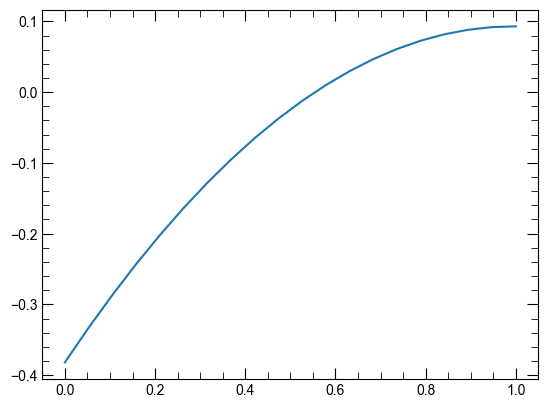

In [21]:
fig, ax = plt.subplots()
ax.plot(x, u)

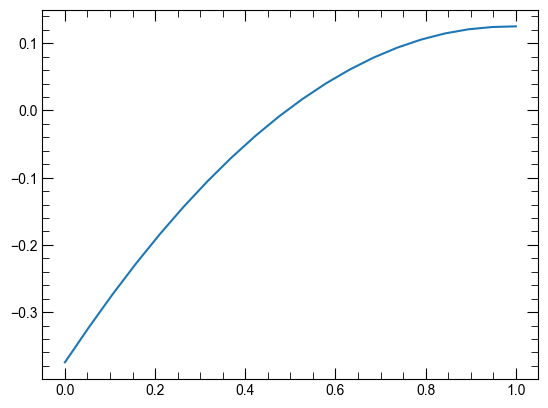

In [50]:
Nx = 20
Nt = 1000
D = 1.0
x = np.linspace(0, 1, Nx)
t = np.linspace(0, 1, Nt)
dx = x[1] - x[0]
dt = t[1] - t[0]
g0 = 1.0
gN = 0.0
alpha = -D * dt / (2 * dx**2)
A = np.zeros((Nx, Nx))
B = np.zeros((Nx, Nx))
u = np.ones(Nx)
for i in range(1, Nx - 1):
    A[i, i - 1] = alpha
    A[i, i] = 1 - 2 * alpha
    A[i, i + 1] = alpha
    B[i, i - 1] = -alpha
    B[i, i] = 1 + 2 * alpha
    B[i, i + 1] = -alpha
A[0, 0] = A[Nx - 1, Nx - 1] = 1
B[0, 0] = B[Nx - 1, Nx - 1] = 1
for itime in range(Nt):
    u[0] = u_new[1] - g0 * dx
    u[Nx - 1] = u_new[Nx - 2] + gN * dx
    b = np.dot(B, u)
    u_new = np.linalg.solve(A, b)
    u = u_new

fig, ax = plt.subplots()
ax.plot(x, u)

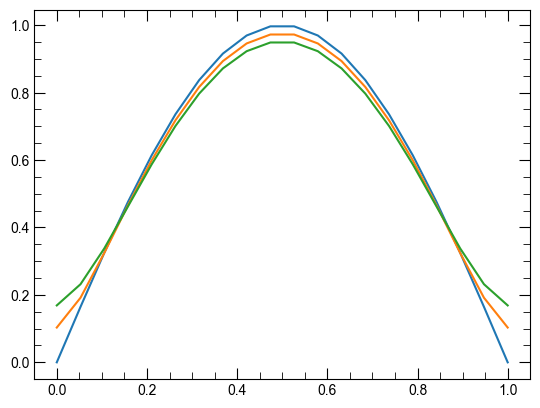

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# パラメータの設定
alpha = 0.01  # 拡散係数
L = 1.0  # ロッドの長さ
T = 0.5  # シミュレーション時間
Nx = 20  # 空間分割数
Nt = 20  # 時間分割数

dx = L / (Nx - 1)
dt = T / Nt
r = alpha * dt / (dx**2)

# 初期条件
u = np.zeros((Nt + 1, Nx))
u[0, :] = np.sin(np.pi * np.linspace(0, L, Nx))

# 境界条件の設定
q0 = 0.0  # x=0での温度勾配
qL = 0.0  # x=Lでの温度勾配

# 行列Aの設定
A = np.zeros((Nx, Nx))
for i in range(1, Nx - 1):
    A[i, i - 1] = -r / 2
    A[i, i] = 1 + r
    A[i, i + 1] = -r / 2
A[0, 0] = 1 + r
A[0, 1] = -r
A[-1, -1] = 1 + r
A[-1, -2] = -r

# 時間発展
for n in range(0, Nt):
    b = (1 - r) * u[n, 1:-1] + (r / 2) * (u[n, 2:] + u[n, :-2])
    b = np.concatenate(([u[n, 0] + r * dx * q0], b, [u[n, -1] - r * dx * qL]))
    u[n + 1, :] = np.linalg.solve(A, b)

fig, ax = plt.subplots()
for n in range(0, Nt + 1, 10):
    ax.plot(np.linspace(0, L, Nx), u[n, :])

In [1]:
import numpy as np
from scipy.interpolate import CubicHermiteSpline

# コロケーション点
x = np.linspace(0, 1, 10)
u_initial = np.sin(np.pi * x)  # 初期条件
du_initial = np.pi * np.cos(np.pi * x)  # 初期条件の導関数

# 基底関数の定義
hermite_splines = CubicHermiteSpline(x, u_initial, du_initial)

# 時間ステップ
dt = 0.01
time_steps = 100

# 初期条件の設定
u = u_initial.copy()

# 時間発展のループ
for t in range(time_steps):
    u = u + dt * hermite_splines.derivative(2)(x)

print(u)

[-0.01391169 -3.08051554 -5.77556375 -7.77399374 -8.83476535 -8.82993388
 -7.76008206 -5.75424981 -3.05437012 -0.01391169]
